### Classification of images using Convolutional Neural Networks (CNNs)

In [20]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import tensorflow as tf

### Image Preprocessing


**Image Data Generator**
- The ImageDataGenerator class in Keras can be used to create a data generator object that can be used to load images from a directory and automatically preprocess them.
- The data generator can also perform data augmentation, which is a technique for artificially increasing the size of a training dataset by creating modified versions of images in the dataset.
- Data augmentation is a useful technique for improving the performance of CNNs on small image datasets.
- The data generator can also be used to normalize the pixel values of the images, which is a common preprocessing step for image classification tasks.


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (300, 300)
batch_size = 32

train_dir = "tomato/train"
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=image_size,
                                                    batch_size=batch_size, 
                                                    class_mode='categorical')

test_dir = "tomato/val"
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=image_size,
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 1984 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


## Building Vanilla CNN Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def get_model():
    model = Sequential()

    # 1st layer CNN
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(300,300,3)))
    model.add(MaxPooling2D(pool_size=(5,5)))

    # 2nd layer CNN
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5,5)))

    # 3rd layer CNN
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    # 4th layer CNN
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))

    # Add flatten layer
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    # Output layer: 4 units for 4 classes and softmax activation for multi-class classification
    model.add(Dense(4, activation='softmax'))

    return model


In [16]:
model = get_model()

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 298, 298, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 59, 59, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,889,860 (18.65 MB)

 Trainable params: 4,889,860 (18.65 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data = test_generator)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.7636 - loss: 0.6541 - val_accuracy: 0.8375 - val_loss: 0.4494
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.8609 - loss: 0.3713 - val_accuracy: 0.8900 - val_loss: 0.2882
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.9046 - loss: 0.2945 - val_accuracy: 0.9125 - val_loss: 0.2571
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.9181 - loss: 0.2185 - val_accuracy: 0.9025 - val_loss: 0.2563
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.9463 - loss: 0.1571 - val_accuracy: 0.9400 - val_loss: 0.1730
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9558 - loss: 0.1309 - val_accuracy: 0.8825 - val_loss: 0.2820
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9688 - loss: 0.0831 - val_accuracy: 0.9050 - val_loss: 0.2854
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.9685 - loss: 0.1068 - val_accuracy: 0.8650 - v

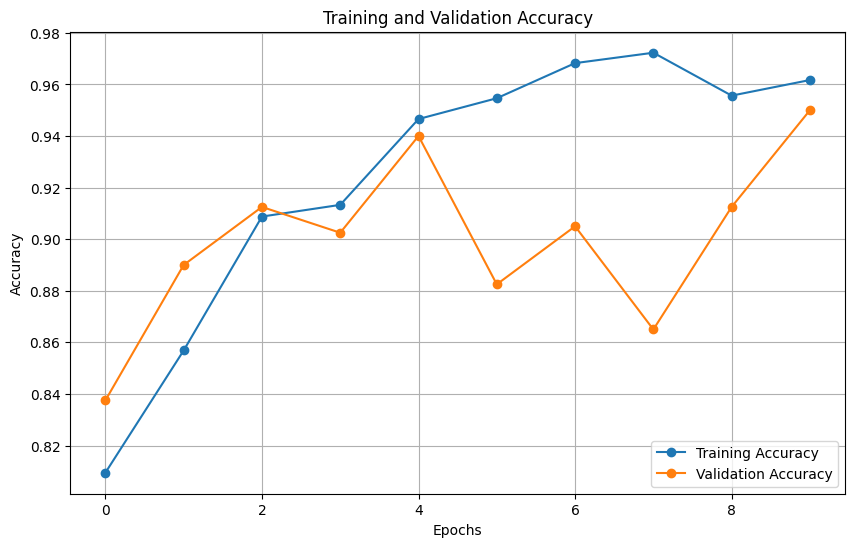

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 651ms/step


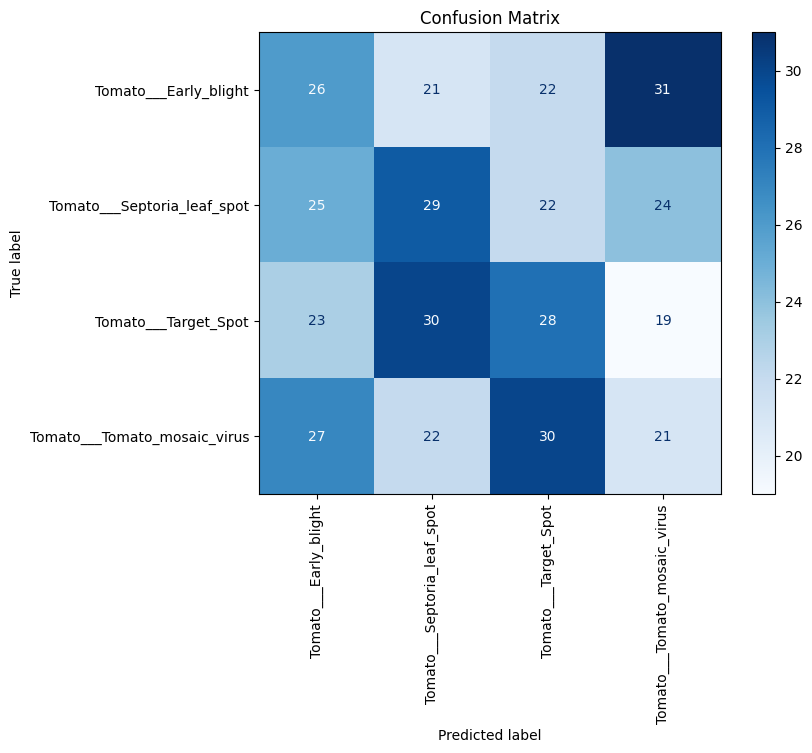

In [31]:
# Plotting the training and validation accuracy in a single graph
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Confusion Matrix




# 1. Make predictions on the validation data
test_generator.reset()  
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# 2. Get the true classes from the generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Get the class labels

# 3. Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 4. Visualize the confusion matrix with vertical x-axis labels
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.xticks(rotation=90)  
plt.title('Confusion Matrix')
plt.show()

In [18]:
import pickle

# Saving the model
with open('model1.pkl', 'wb') as file:
    pickle.dump(model, file)

## L2 regularization RMSPROP with Early stopping

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

def get_model2():
    model2 = Sequential()

    # 1st layer CNN
    model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(300,300,3), kernel_regularizer=l2(0.001)))
    model2.add(MaxPooling2D(pool_size=(5,5)))
   

    # 2nd layer CNN
    model2.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001)))
    model2.add(MaxPooling2D(pool_size=(5,5)))


    # 3rd layer CNN
    model2.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001)))
    model2.add(MaxPooling2D(pool_size=(3,3), strides=2))
    

    # 4th layer CNN
    model2.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001)))
    

    # Add flatten layer
    model2.add(Flatten())
    model2.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    

    
    model2.add(Dense(4, activation='softmax'))

    return model2





In [11]:
model2 = get_model2()

c:\Users\LENOVO\desktop\model train\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,889,860 (18.65 MB)

 Trainable params: 4,889,860 (18.65 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:


from tensorflow.keras.optimizers import RMSprop

# Compile the model using RMSprop
model2.compile(optimizer=RMSprop(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model with early stopping
history2 = model2.fit(train_generator, epochs=10, validation_data = test_generator)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.2749 - loss: 2.1959 - val_accuracy: 0.4750 - val_loss: 1.6645
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.4094 - loss: 1.6699 - val_accuracy: 0.5300 - val_loss: 1.3179
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.4975 - loss: 1.3213 - val_accuracy: 0.5525 - val_loss: 1.1533
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.5707 - loss: 1.1557 - val_accuracy: 0.5425 - val_loss: 1.1010
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.6432 - loss: 1.0036 - val_accuracy: 0.4700 - val_loss: 1.3632
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.7033 - loss: 0.8747 - val_accuracy: 0.4875 - val_loss: 1.3989
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.7720 - loss: 0.7236 - val_accuracy: 0.6400 - val_loss: 0.9324
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.7665 - loss: 0.6876 - val_accuracy: 0.8550 - v

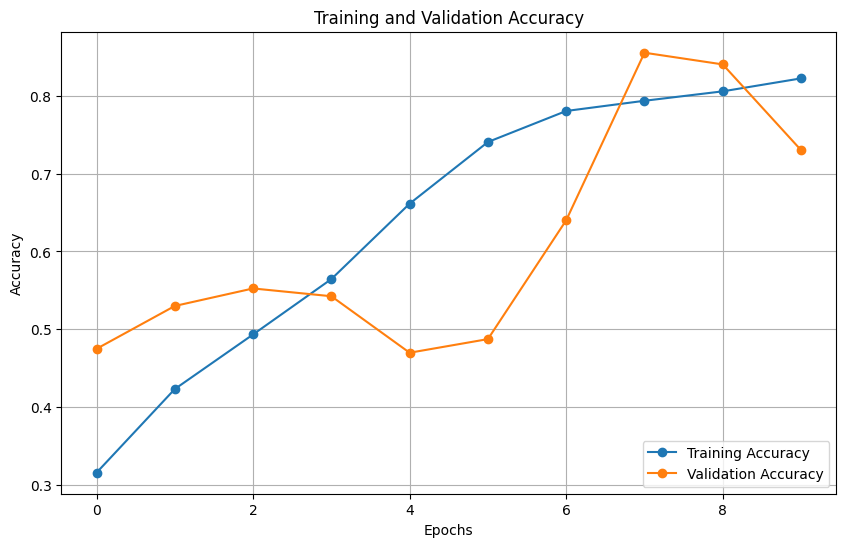

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 705ms/step


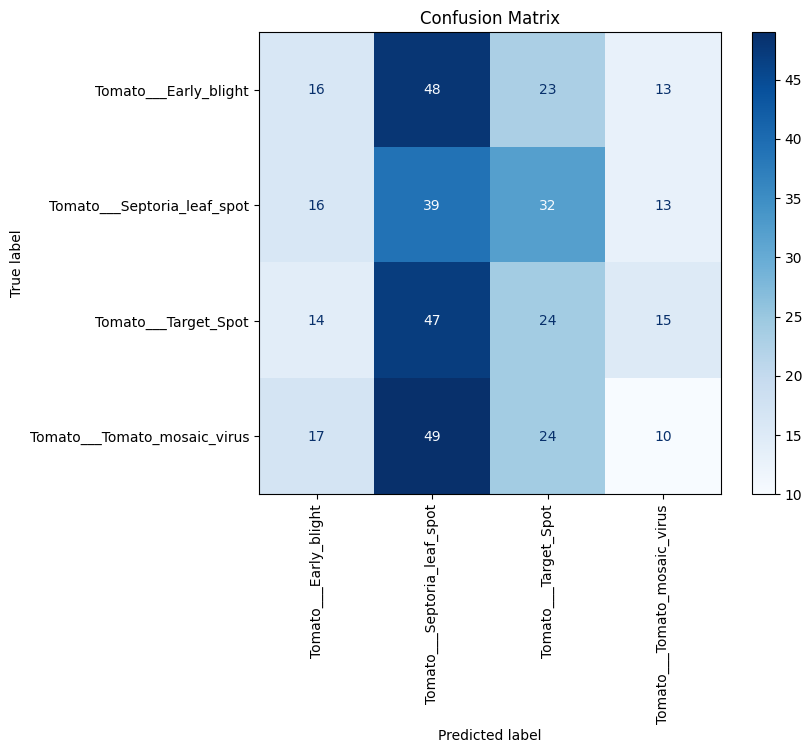

In [21]:
# Plotting the training and validation accuracy in a single graph
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Confusion Matrix



# 1. Make predictions on the validation data
test_generator.reset()  
predictions = model2.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# 2. Get the true classes from the generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Get the class labels

# 3. Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 4. Visualize the confusion matrix with vertical x-axis labels
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.xticks(rotation=90)  
plt.title('Confusion Matrix')
plt.show()

In [13]:
import pickle

# Saving the model
with open('model2.pkl', 'wb') as file:
    pickle.dump(model2, file)

### Dropout with Adam optimizer

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def get_model3():
    model3 = Sequential()

    # 1st layer CNN with Dropout
    model3.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(300,300,3)))
    model3.add(MaxPooling2D(pool_size=(5,5)))
    model3.add(Dropout(0.25))  # Dropout added here

    # 2nd layer CNN
    model3.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
    model3.add(MaxPooling2D(pool_size=(5,5)))

    # 3rd layer CNN
    model3.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
    model3.add(MaxPooling2D(pool_size=(3,3), strides=2))

    # 4th layer CNN
    model3.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))

    # Add flatten layer
    model3.add(Flatten())
    model3.add(Dense(512, activation='relu'))

    # Output layer: 4 units for 4 classes and softmax activation for multi-class classification
    model3.add(Dense(4, activation='softmax'))

    return model3

In [23]:
model3 = get_model3()
model3.summary()

c:\Users\LENOVO\desktop\model train\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 298, 298, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 59, 59, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 59, 59, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 57, 57, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,889,860 (18.65 MB)

 Trainable params: 4,889,860 (18.65 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(train_generator, epochs=10, validation_data = test_generator)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.2795 - loss: 1.4478 - val_accuracy: 0.4350 - val_loss: 1.1858
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.4755 - loss: 1.1156 - val_accuracy: 0.3850 - val_loss: 1.3314
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.5258 - loss: 0.9949 - val_accuracy: 0.6950 - val_loss: 0.8670
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.6771 - loss: 0.8324 - val_accuracy: 0.8175 - val_loss: 0.5834
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.8079 - loss: 0.5016 - val_accuracy: 0.8650 - val_loss: 0.4099
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.8894 - loss: 0.3476 - val_accuracy: 0.8350 - val_loss: 0.4090
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9014 - loss: 0.2873 - val_accuracy: 0.8950 - val_loss: 0.2754
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 219s 4s/step - accuracy: 0.9088 - loss: 0.2669 - val_accuracy: 0.8300 - v

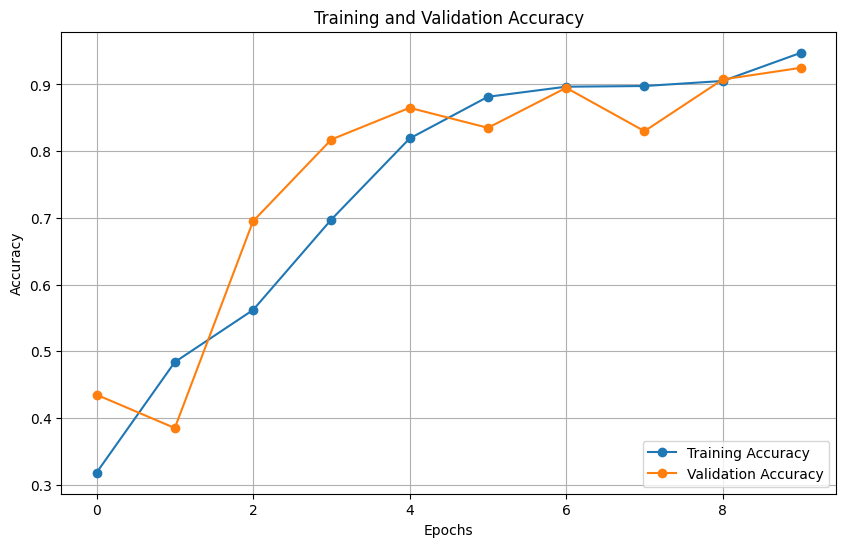

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 693ms/step


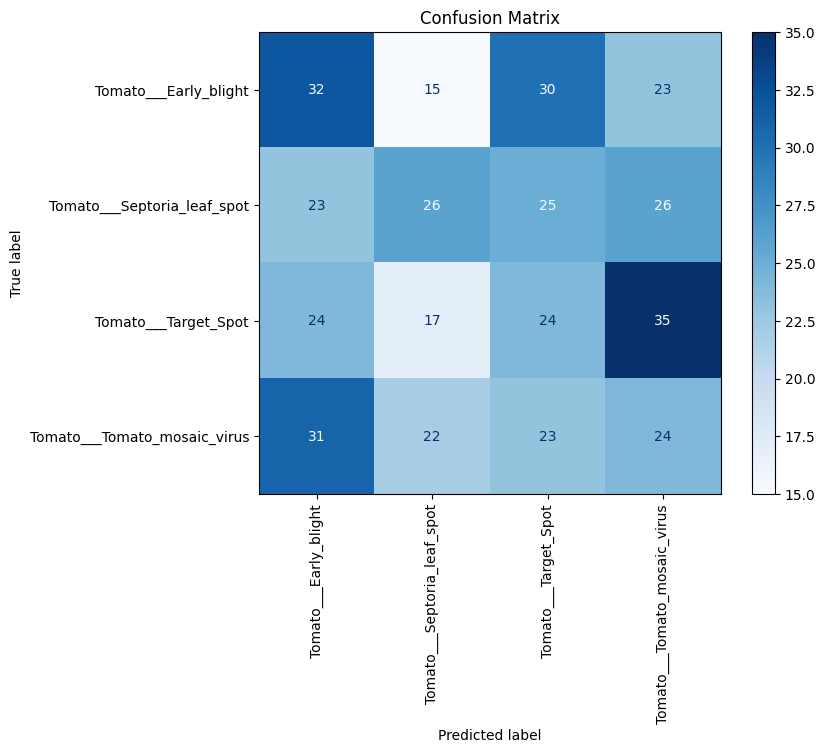

In [25]:
# Plotting the training and validation accuracy in a single graph
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Confusion Matrix



# 1. Make predictions on the validation data
test_generator.reset()  
predictions = model3.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# 2. Get the true classes from the generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Get the class labels

# 3. Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 4. Visualize the confusion matrix with vertical x-axis labels
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.xticks(rotation=90)  
plt.title('Confusion Matrix')
plt.show()